In [2]:
import numpy as np
from itcl_quantizer.equalizers.adaround.Calculationsint import ADAInt
from scipy.stats import yeojohnson

#input_f = np.random.normal(0,1, size=(1000, 49))
input_f=x_test=np.load('X_test.npy') 
print(input_f.shape)
input_f=input_f[:1000]
kernel = np.random.uniform(-1, 1, size=(100,100))
bias = np.random.uniform( -1,1, size=(100,))
output_f = np.zeros((input_f.shape[0], bias.shape[0]))
for i in range(0,input_f[:,0].shape[0]):
    output_f[i]=kernel.dot(input_f[i])+bias

input_s=0.003921568
kernel_s=0.026389943
bias_s=0.000103489




[ INFO ] 07:41:08.659 get_logger logger initialized
[ WARNING ] 07:41:08.659 get_logger logger initialized
[ ERROR ] 07:41:08.659 get_logger logger initialized
[ CRITICAL ] 07:41:08.659 get_logger logger initialized


2024-05-08 07:41:09,631 dwave.cloud INFO MainThread Log level for 'dwave.cloud' namespace set to 0


(10000, 100)


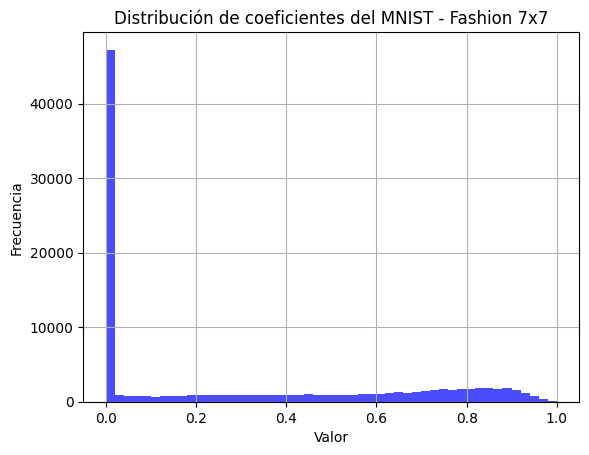

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Partiendo de una matriz


# Convertir la matriz en un vector
coeficientes = input_f.flatten()

# Crear el histograma
plt.hist(coeficientes, bins=50, color='blue', alpha=0.7)
plt.title('Distribución de coeficientes del MNIST - Fashion 7x7')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [12]:
diccionario_unido2={}
AdaInt=ADAInt(input_f,kernel,bias,output_f,input_s,kernel_s,bias_s)
Redondeo_Kernel=np.zeros((AdaInt.output_dimension(),AdaInt.input_dimension()))
Redondeo_Bias=np.zeros((AdaInt.output_dimension()))

M = np.zeros((AdaInt.output_dimension()*AdaInt.input_dimension()+AdaInt.output_dimension(), AdaInt.output_dimension()*AdaInt.input_dimension()+AdaInt.output_dimension()))
for l in range(0,AdaInt.output_dimension()):
    print('l',l)
    Dicionario1={}
    Dicionario2={}
    diccionario2={}
    Dicionario3={}
    Dicionario4={}
    diccionario4={}
    Dicionario={}
    diccionario1=AdaInt.bterm1_calculation_subespacio(Dicionario1,l)
    if l==0:           

        diccionario2, Bt2=AdaInt.bterm2_calculation_subespacio(Dicionario2,l)
    else:
        diccionario2=AdaInt.bterm2_calculation_repeticion(Bt2,diccionario2,l)
    diccionario3=AdaInt.bterm3_calculation_subespacio(Dicionario3,l)
    if l==0:
        diccionario4,bt4=AdaInt.bterm4_calculation_subespacio(Dicionario4,l)
    else:
        diccionario4=AdaInt.bterm4_calculation_repeticion(diccionario4,bt4,l)

    diccionario_unido=AdaInt.unir_diccionarios(diccionario1,diccionario2,diccionario3,diccionario4,Dicionario)
    if l==0:
        diccionario_unido2=AdaInt.unir_diccionarios(diccionario1,diccionario2,diccionario3,diccionario4,diccionario_unido2)
    #AdaInt.matrix_calculation(M,diccionario1,diccionario2,diccionario3,diccionario4)
    result=AdaInt.quantum_annealing(diccionario_unido)
    #result2=AdaInt.qaoa_solution(diccionario_unido)
    Redondeo_Kernel[l], Redondeo_Bias[l]=AdaInt.tensor_redondeo(result,Redondeo_Kernel,Redondeo_Bias,l)
tensors=[Redondeo_Kernel,Redondeo_Bias]
print(diccionario_unido2)

l 0
l 1
l 2
l 3
l 4
l 5
l 6
l 7
l 8
l 9
l 10
l 11
l 12
l 13
l 14
l 15
l 16
l 17
l 18
l 19
l 20
l 21
l 22
l 23
l 24
l 25
l 26
l 27
l 28
l 29
l 30
l 31
l 32
l 33
l 34
l 35
l 36
l 37
l 38
l 39
l 40
l 41
l 42
l 43
l 44
l 45
l 46
l 47
l 48
l 49
l 50
l 51
l 52
l 53
l 54
l 55
l 56
l 57
l 58
l 59
l 60
l 61
l 62
l 63
l 64
l 65
l 66
l 67
l 68
l 69
l 70
l 71
l 72
l 73
l 74
l 75
l 76
l 77
l 78
l 79
l 80
l 81
l 82
l 83
l 84
l 85
l 86
l 87
l 88
l 89
l 90
l 91
l 92
l 93
l 94
l 95
l 96
l 97
l 98
l 99
{(1, 1): -5.667939433351421e-07, (2, 2): -7.128434816294771e-05, (3, 3): -0.0013103990683838163, (4, 4): -0.006425070889317652, (5, 5): -0.01119530866838403, (6, 6): -0.01129739211032188, (7, 7): -0.007665559762543239, (8, 8): -0.0020152198025265022, (9, 9): -0.000275394031344689, (10, 10): -4.5663209355950585e-05, (11, 11): -9.823723209478885e-05, (12, 12): -0.0009071209293693983, (13, 13): -0.006535904693489414, (14, 14): -0.01031580243712682, (15, 15): -0.01139565901090478, (16, 16): -0.011698254858522

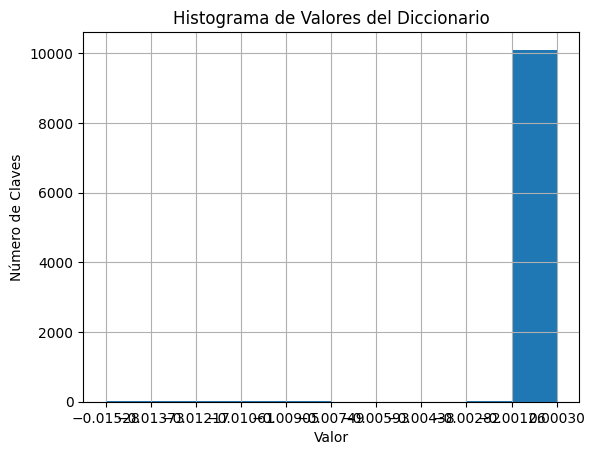

In [13]:
import numpy as np
import matplotlib.pyplot as plt
diccionario = diccionario_unido2
# Extraemos los valores del diccionario
valores = list(diccionario.values())

# Calculamos automáticamente los límites de los intervalos
min_valor = min(valores)
max_valor = max(valores)
num_intervalos = 10  # Puedes ajustar el número de intervalos según tus necesidades
intervalos = np.linspace(min_valor, max_valor, num=num_intervalos+1)

# Calculamos el histograma de los valores en los intervalos
histograma, bins = np.histogram(valores, bins=intervalos)

# Graficamos el histograma
plt.bar(bins[:-1], histograma, width=np.diff(bins), align='edge')
plt.xlabel('Valor')
plt.ylabel('Número de Claves')
plt.title('Histograma de Valores del Diccionario')
plt.xticks(intervalos)
plt.grid(True)
plt.show()

In [ ]:
import dimod
import neal
from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.system import LeapHybridSampler
def Quantum_annealing_simulator(Diccionario):
    J=Diccionario
    h={}
    problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.BINARY)
    
    api_key = 'DEV-af84b145c783a09fc23798ac31bee43d343a6787'
    
    sampler2 = EmbeddingComposite(DWaveSampler(token=api_key))
    #print(problem)
    print('cuantico')
    
    result2 = sampler2.sample(problem, num_reads=30,annealing_time=20)
    print(result2)
    
    #solver = greedy.SteepestDescentSolver()
    #result = solver.sample(problem, num_reads = 50)
    #print('dwave')
    #print('SteepestDEscentSolver')
    #print(result)
    
    
    solver = neal.SimulatedAnnealingSampler()
    result3 = solver.sample(problem)
    print('Neal')
    print(result3)
    '''
    solver = LeapHybridSampler(token=api_key)
    result4=solver.sample(problem)
    print('hybrid')
    print(result4)
    '''
    
    #solver2 = dimod.ExactSolver()
    #response = solver2.sample(problem)
    #min_energy_sample = next(response.samples())
    #min_energy = next(response.data()).energy
    #print(min_energy_sample,min_energy)
    
    return result3

In [ ]:
Quantum_annealing_simulator(diccionario_unido2)

2024-05-03 13:33:18,299 dwave.cloud.client.base INFO MainThread Fetching definitions of all available solvers


2024-05-03 13:33:20,358 dwave.cloud.client.base INFO MainThread Received solver data for 6 solver(s).
2024-05-03 13:33:20,407 dwave.cloud.client.base INFO MainThread Adding solver StructuredSolver(id='Advantage_system4.1')
2024-05-03 13:33:20,480 dwave.cloud.client.base INFO MainThread Adding solver StructuredSolver(id='Advantage_system6.4')
2024-05-03 13:33:20,504 dwave.cloud.client.base INFO MainThread Adding solver StructuredSolver(id='Advantage2_prototype2.3')


cuantico
    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 2402   energy num_oc. ...
0   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0      11 ...
1   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
2   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
3   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
4   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
5   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
7   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
9   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    0      0.0       1 ...
6   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    1 0.000338       1 ...
8   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...    

SampleSet(rec.array([([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -1.66533454e-16, 1)],
          dtype=[('sample', 'i1', (50,)), ('energy', '<f8'), ('num_occurrences', '<i4')]), Variables([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 2402]), {'beta_range': [41.152793384321264, 19890803.56932918], 'beta_schedule_type': 'geometric', 'timing': {'preprocessing_ns': 2893900, 'sampling_ns': 1136900, 'postprocessing_ns': 169700}}, 'BINARY')

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

# Modelado y test estadísticos
# ==============================================================================
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
       'Estadistica-machine-learning-python/master/data/Snmesp.csv')
datos = pd.read_csv(url)
datos['year'] = datos['year'].astype(str) 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1476 non-null   object 
 1   salary  1476 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.2+ KB


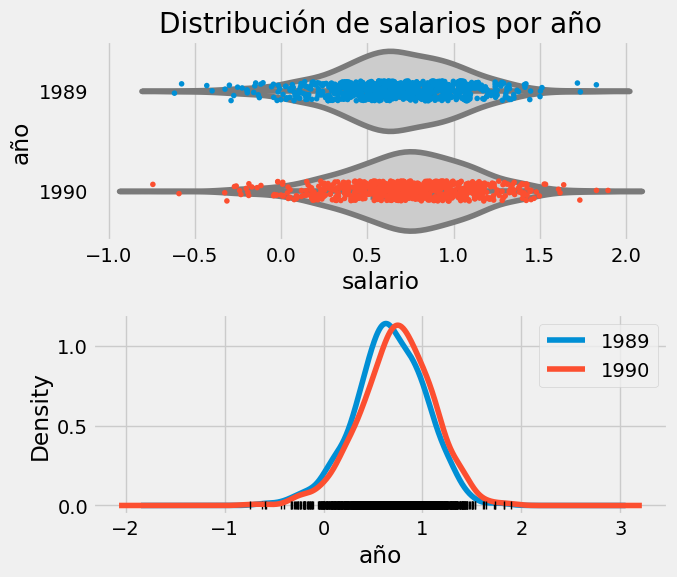

In [ ]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))
sns.violinplot(
    x     = datos.salary,
    y     = datos.year,
    color = ".8",
    ax    = axs[0]
)

sns.stripplot(
    x     = datos.salary,
    y     = datos.year,
    data = datos,
    size = 4,
    jitter  = 0.1,
    ax = axs[0]
)
axs[0].set_title('Distribución de salarios por año')
axs[0].set_ylabel('año')
axs[0].set_xlabel('salario');

for year in datos.year.unique():
    datos_temp = datos[datos.year == year]['salary']
    datos_temp.plot.kde(ax=axs[1], label=year)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

axs[1].set_xlabel('año');
axs[1].legend()

fig.tight_layout();

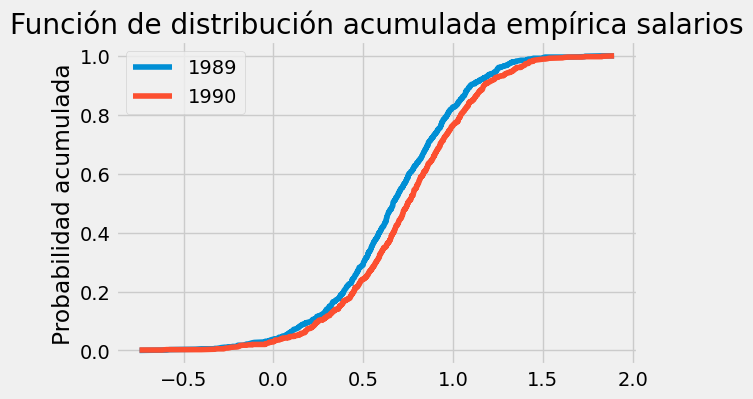

In [ ]:
# Ajuste de las funciones ecdf con cada muestra
# ==============================================================================
ecdf_1989 = ECDF(datos.loc[datos.year == '1989', 'salary'])
ecdf_1990 = ECDF(datos.loc[datos.year == '1990', 'salary'])
# Estimación de la probabilidad acumulada de cada valor de salario observado
# ==============================================================================
grid_salario = np.sort(datos.salary.unique())
prob_acumulada_ecdf_1989 = ecdf_1989(grid_salario)
prob_acumulada_ecdf_1990 = ecdf_1990(grid_salario)
# Representación gráfica de las curvas ecdf
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(grid_salario, prob_acumulada_ecdf_1989, label='1989')
ax.plot(grid_salario, prob_acumulada_ecdf_1990, label='1990')
ax.set_title("Función de distribución acumulada empírica salarios")
ax.set_ylabel("Probabilidad acumulada")
ax.legend();

In [ ]:
# Distancia Kolmogorov–Smirnov
# ==============================================================================
abs_dif = np.abs(prob_acumulada_ecdf_1989 - prob_acumulada_ecdf_1990)
distancia_ks = np.max(abs_dif)
print(f"Distancia Kolmogorov–Smirnov: {distancia_ks :.4f}")

Distancia Kolmogorov–Smirnov: 0.1057


In [ ]:
# Test Kolmogorov–Smirnov entre dos muestras
# ==============================================================================
ks_2samp(
    datos.loc[datos.year == '1989', 'salary'],
    datos.loc[datos.year == '1990', 'salary']
)

KstestResult(statistic=0.10569105691056911, pvalue=0.0005205845230085144, statistic_location=0.6692902, statistic_sign=1)